
Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

Contabilização de amostras por classe:
quality
6    2198
5    1457
7     880
8     175
4     

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


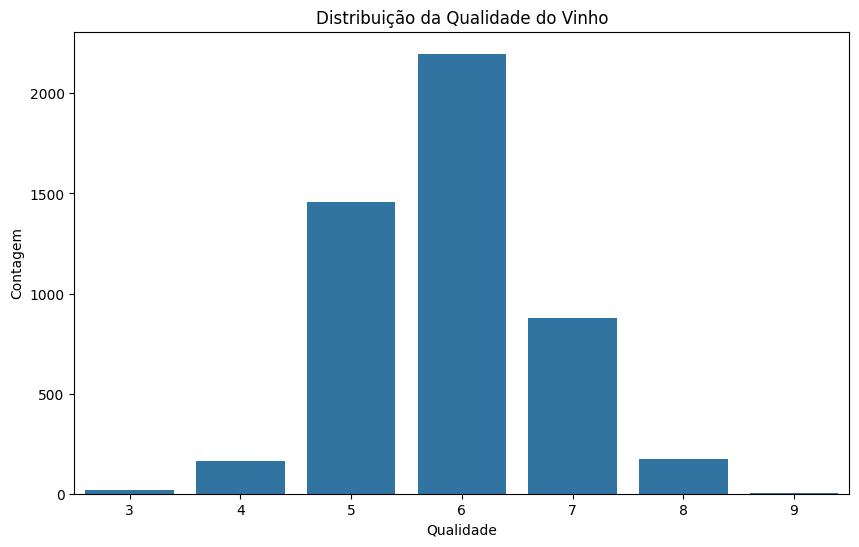

In [112]:
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

# Para pruning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Para quantização
import joblib
import time
import sys


RANDOM_STATE = 2  # ou qualquer outro número

# Carregar o dataset
dataset = pd.read_csv("./winequality-white.csv", sep=";")

# Informações gerais
print("\nInformações gerais do dataset:")
dataset.info()

# Contabiliza numero de amostras por classe
print("\nContabilização de amostras por classe:")
print(dataset['quality'].value_counts())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
display(dataset.describe())
# Análise da distribuição da variável alvo (quality)
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=dataset)
plt.title('Distribuição da Qualidade do Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')
plt.savefig('/output/quality_distribution.png')
plt.show()

- Adicionar esse gráfico de correlação.
- Mencionar que o alcool é diretamente relacionado à qualidade e inversamente relacionado à densidade. Oq faz sentido já que alcool é menos denso que água.


In [113]:
# TODO:NÃO ESTOU NORMALIZANDO OS DADOS AQUI 

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import PowerTransformer

# Definir features e target
X = dataset.drop('quality', axis=1)
y = dataset['quality']

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled = X


In [114]:
# from scipy import stats

# # Remove outliers apenas das features mais problemáticas
# def remove_outliers(df, columns=None, threshold=3):
#     df_clean = df.copy()
#     if columns is None:
#         columns = [col for col in df.columns if col != 'quality']  # Mantém 'quality'
    
#     # Para cada feature especificada, localiza os outliers
#     indices_to_keep = np.ones(len(df), dtype=bool)
    
#     for col in columns:
#         z_scores = np.abs(stats.zscore(df_clean[col]))
#         column_mask = z_scores < threshold
#         indices_to_keep = indices_to_keep & column_mask
    
#     # Remove todas as linhas com outliers
#     df_clean = df_clean[indices_to_keep]
    
#     print(f"Removidos {len(df) - len(df_clean)} registros ({(len(df) - len(df_clean))/len(df)*100:.2f}%)")
#     return df_clean

# # Removendo outliers apenas das colunas com maior porcentagem
# problema_cols = ['volatile acidity', 'chlorides', 'free sulfur dioxide']
# dataset_clean = remove_outliers(dataset, columns=problema_cols)

# # Agora separe X e y do conjunto limpo
# X_scaled = dataset_clean.drop('quality', axis=1)
# y = dataset_clean['quality']

In [115]:
# Divide os conjuntos

# Divisão em treino+validação e teste
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# Divisão do conjunto temp em treino e validação
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=RANDOM_STATE, stratify=y_temp)  # 0.25*0.8=0.2

print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

Tamanho do conjunto de treino: 2938
Tamanho do conjunto de validação: 980
Tamanho do conjunto de teste: 980


In [116]:
# Aplica SMOTE para balancear as classes (VALIDAR EFETIVIDADE)

# from imblearn.combine import SMOTETomek
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # # Primeiro, criamos o objeto SMOTE com os parâmetros desejados
# # smote = SMOTE(k_neighbors=3, random_state=RANDOM_STATE)

# # Depois, criamos o SMOTETomek usando o SMOTE configurado
# smt = SMOTETomek(sampling_strategy='auto',  random_state=RANDOM_STATE)

# # Aplicando SMOTE aos dados
# X_train, y_train = smt.fit_resample(X_train, y_train)


# # Verificando a nova distribuição
# print("Nova distribuição das classes:", Counter(y_train))

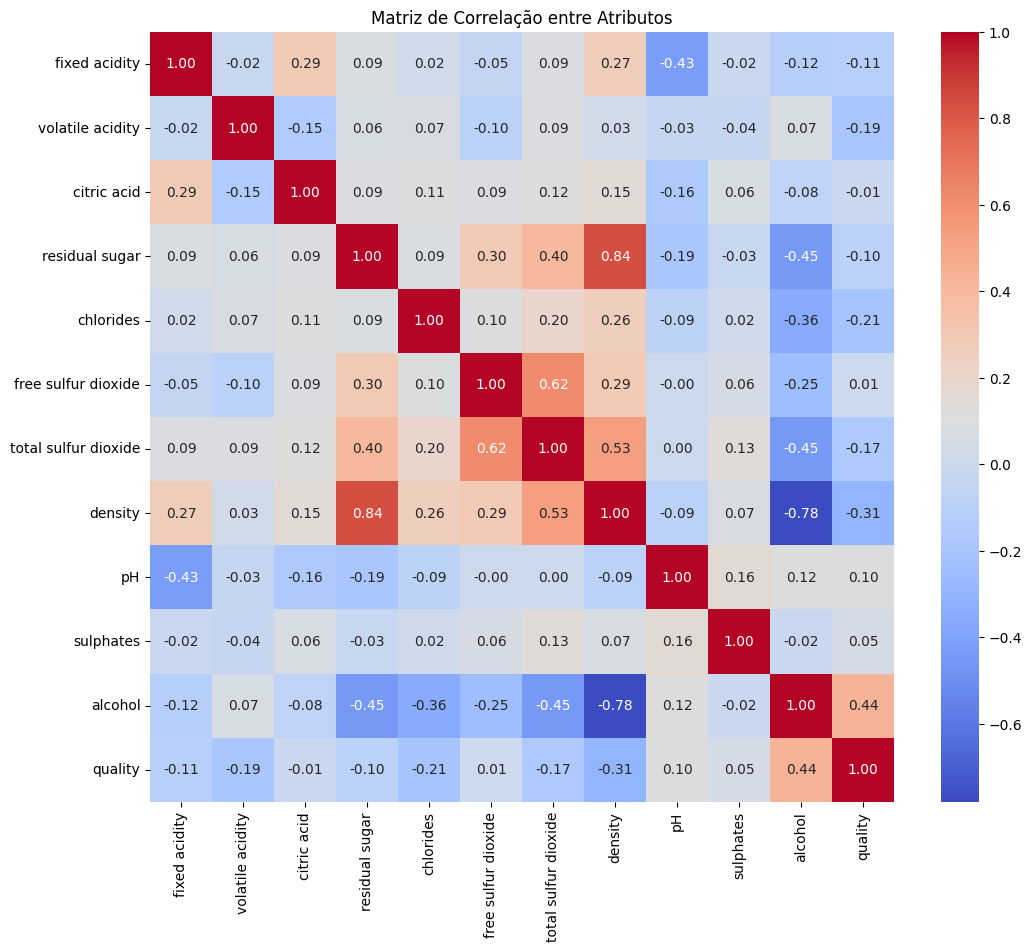

Correlação com a qualidade do vinho:


quality                 1.000000
alcohol                 0.435575
density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
pH                      0.099427
residual sugar         -0.097577
sulphates               0.053678
citric acid            -0.009209
free sulfur dioxide     0.008158
Name: quality, dtype: float64

In [117]:
# Matriz de correlação
plt.figure(figsize=(12, 10))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Atributos')
plt.show()

# Correlação com a variável alvo (qualidade)
target_corr = corr_matrix['quality'].reindex(
  corr_matrix['quality'].abs().sort_values(ascending=False).index
)
print("Correlação com a qualidade do vinho:")
display(target_corr)


In [118]:
## Treina o modelo de referência (baseline)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

start_time = time.time()
rf_baseline_model = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    class_weight='balanced'  # Para lidar com desbalanceamento de classes
)
rf_baseline_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time

# Avaliar no conjunto de validação
y_val_pred_rf = rf_baseline_model.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, y_val_pred_rf)
rf_val_f1 = f1_score(y_val, y_val_pred_rf, average='weighted')


print(f"Random Forest Model:")
print(f"Tempo de treinamento: {rf_training_time:.4f} segundos")
print(f"Acurácia no conjunto de validação: {rf_val_accuracy:.4f}")
print(f"Profundidade da árvore: {rf_baseline_model.get_depth()}")

Random Forest Model:
Tempo de treinamento: 0.0392 segundos
Acurácia no conjunto de validação: 0.5531
Profundidade da árvore: 28


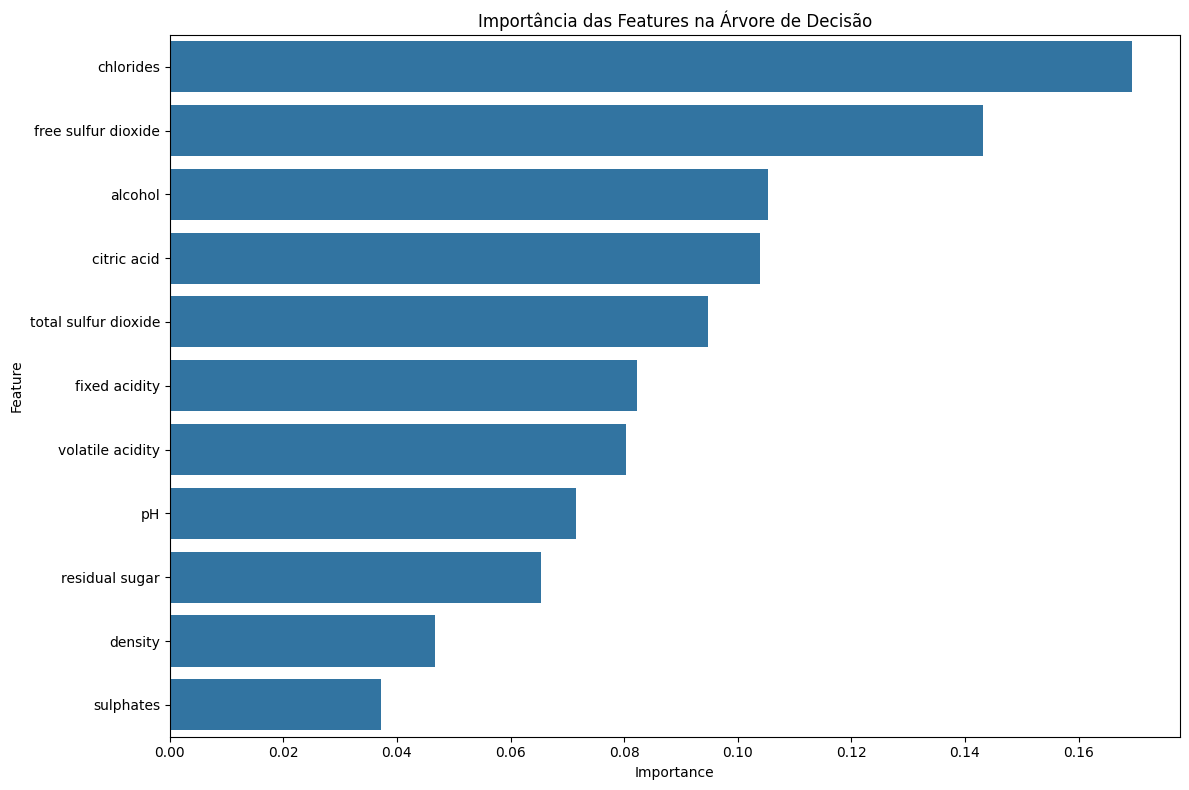

In [119]:
# Visualizar importância de features
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_baseline_model.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importância das Features na Árvore de Decisão')
plt.tight_layout()
plt.show()


In [120]:
# Otimização do modelo com pruning de tamanho e profundidade

from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Definir parâmetros para pruning
param_grid = {
    'max_depth': [5, 10, 15, 20, 25,28],
}

# Aplicar GridSearchCV para encontrar melhores parâmetros
dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=RANDOM_STATE,class_weight='balanced'),
    param_grid=param_grid,
    cv=stratified_cv,
    scoring=['accuracy', 'balanced_accuracy', 'f1_weighted'],
    refit='f1_weighted',  # Choose which metric to use for selecting best model,
    n_jobs=-1  # Usar todos os cores disponíveis
)

dt_grid_search.fit(X_train, y_train)

# Encontrar o melhor modelo
best_pruned_model = dt_grid_search.best_estimator_

# Resultados
print(f"Melhores parâmetros: {dt_grid_search.best_params_}")
print(f"Profundidade: {best_pruned_model.max_depth:.2f}")

# Comparar com o baseline
pruned_val_acc = accuracy_score(y_val, best_pruned_model.predict(X_val))
print(f"Acurácia no conjunto de validação: {pruned_val_acc:.4f}")



Melhores parâmetros: {'max_depth': 28}
Profundidade: 28.00
Acurácia no conjunto de validação: 0.5531


c:\Users\anton\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


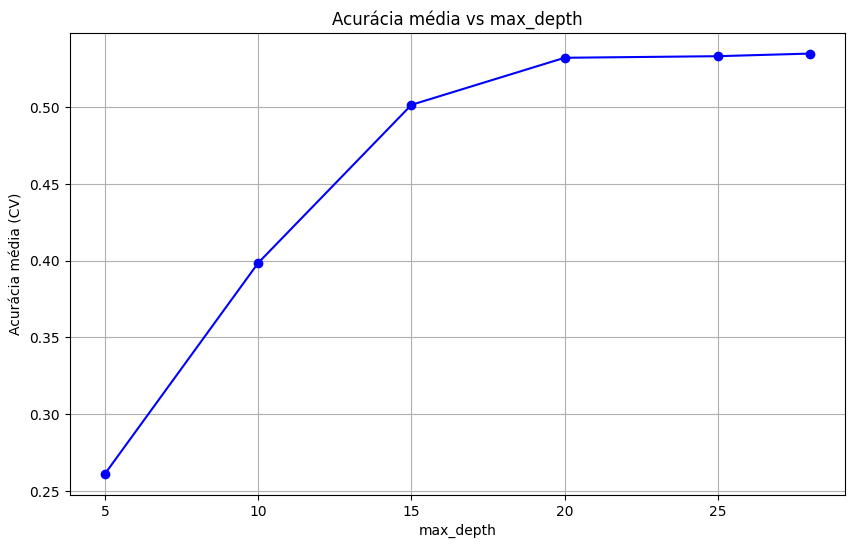

In [121]:
# Gráfico da taxa de acerto em função da profundidade máxima
results = pd.DataFrame(dt_grid_search.cv_results_)
plt.figure(figsize=(10, 6))

depth_values = []
accuracy_values = []

for depth in sorted([d for d in results['param_max_depth'].unique() if d is not None]):
    mask = results['param_max_depth'] == depth
    depth_values.append(depth)
    accuracy_values.append(results.loc[mask, 'mean_test_accuracy'].values[0])

plt.plot(depth_values, accuracy_values, 'b-o')
plt.xlabel('max_depth')
plt.ylabel('Acurácia média (CV)')
plt.title('Acurácia média vs max_depth')
plt.grid(True)
plt.show()

Features: 1, Train Acc: 0.1875, Val Acc: 0.1459
Features: 2, Train Acc: 0.7720, Val Acc: 0.4276
Features: 3, Train Acc: 0.9908, Val Acc: 0.5602
Features: 4, Train Acc: 1.0000, Val Acc: 0.5592
Features: 5, Train Acc: 1.0000, Val Acc: 0.5592
Features: 6, Train Acc: 1.0000, Val Acc: 0.5745
Features: 7, Train Acc: 1.0000, Val Acc: 0.5480
Features: 8, Train Acc: 1.0000, Val Acc: 0.5500
Features: 9, Train Acc: 0.9980, Val Acc: 0.5398
Features: 10, Train Acc: 1.0000, Val Acc: 0.5449
Features: 11, Train Acc: 1.0000, Val Acc: 0.5551


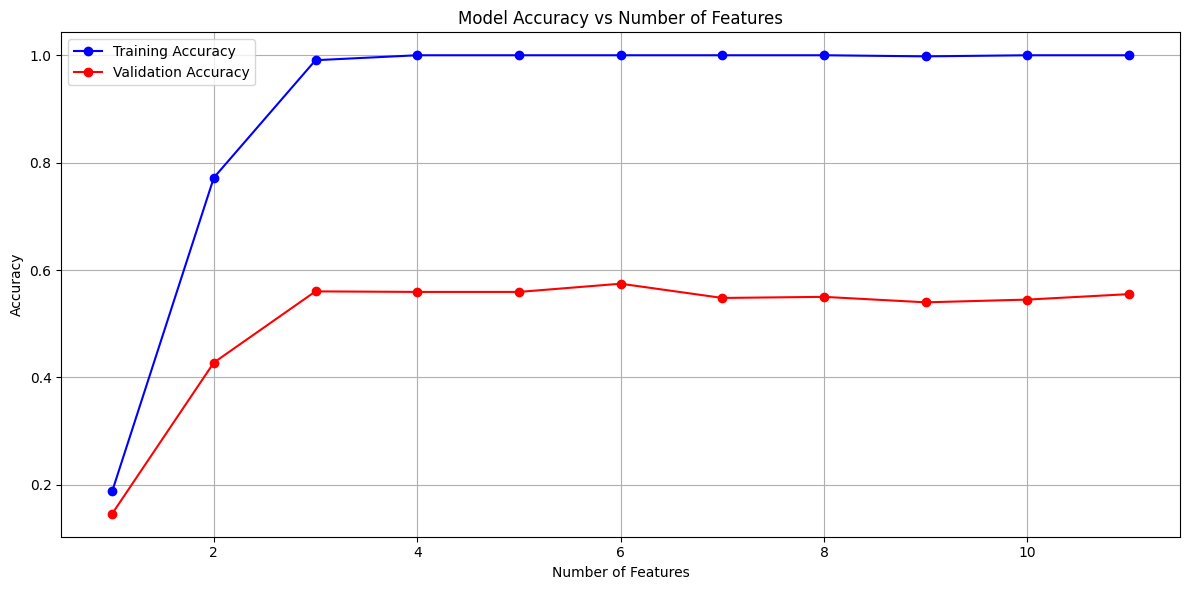


Optimal number of features: 6
Features used: chlorides, free sulfur dioxide, alcohol, citric acid, total sulfur dioxide, fixed acidity
Validation Accuracy: 0.5745


,Number of Features,Training Accuracy,Validation Accuracy,Features Used
0,1,0.187543,0.145918,chlorides
1,2,0.771954,0.427551,"chlorides, free sulfur dioxide"
2,3,0.990810,0.560204,"chlorides, free sulfur dioxide, alcohol"
3,4,1.000000,0.559184,"chlorides, free sulfur dioxide, alcohol, citri..."
4,5,1.000000,0.559184,"chlorides, free sulfur dioxide, alcohol, citri..."
5,6,1.000000,0.574490,"chlorides, free sulfur dioxide, alcohol, citri..."
6,7,1.000000,0.547959,"chlorides, free sulfur dioxide, alcohol, citri..."
7,8,1.000000,0.550000,"chlorides, free sulfur dioxide, alcohol, citri..."
8,9,0.997958,0.539796,"chlorides, free sulfur dioxide, alcohol, citri..."
9,10,1.000000,0.544898,"chlorides, free sulfur dioxide, alcohol, citri..."


In [122]:
# Gera gráfico relacionando o número de features com a taxa de acerto

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_pruned_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Get ordered features from most to least important
ordered_features = feature_importance['Feature'].values

# Create lists to store results
num_features_list = []
val_accuracy_list = []
train_accuracy_list = []
feature_sets = []

# Get the best hyperparameters
max_depth = best_pruned_model.max_depth

# Iterate through different numbers of features
for i in range(1, len(ordered_features) + 1):
    # Take i most important features
    selected_features = ordered_features[:i]
    feature_sets.append(', '.join(selected_features))
    
    # Get indices of selected features
    selected_indices = [list(X.columns).index(feat) for feat in selected_features]
    
    # Select only these features from the datasets
    X_train_selected = X_train[:, selected_indices]
    X_val_selected = X_val[:, selected_indices]
    
    # Train a new model with the same hyperparameters as the best model
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        random_state=RANDOM_STATE,
        class_weight='balanced'
    )
    model.fit(X_train_selected, y_train)
    
    # Evaluate the model
    train_accuracy = accuracy_score(y_train, model.predict(X_train_selected))
    val_accuracy = accuracy_score(y_val, model.predict(X_val_selected))
    
    # Store results
    num_features_list.append(i)
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)
    
    print(f"Features: {i}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Number of Features': num_features_list,
    'Training Accuracy': train_accuracy_list,
    'Validation Accuracy': val_accuracy_list,
    'Features Used': feature_sets
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(num_features_list, train_accuracy_list, 'b-o', label='Training Accuracy')
plt.plot(num_features_list, val_accuracy_list, 'r-o', label='Validation Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Number of Features')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Find the optimal number of features (highest validation accuracy)
optimal_idx = val_accuracy_list.index(max(val_accuracy_list))
optimal_features = num_features_list[optimal_idx]
print(f"\nOptimal number of features: {optimal_features}")
print(f"Features used: {feature_sets[optimal_idx]}")
print(f"Validation Accuracy: {val_accuracy_list[optimal_idx]:.4f}")

# Show detailed results table
display(results_df)

# Define o número de features ótimas como 6 pois houve pouca queda na taxa de acerto
optimal_features = 6



Acurácia do modelo quantizado no conjunto de validação: 0.5531
Bits: 1, Acurácia: 0.0408
Bits: 2, Acurácia: 0.0214
Bits: 4, Acurácia: 0.0204
Bits: 8, Acurácia: 0.0194
Bits: 16, Acurácia: 0.0194
Bits: 32, Acurácia: 0.0194
Bits: 64, Acurácia: 0.0531


C:\TEMP\ipykernel_47548\4180156741.py:16: RuntimeWarning: invalid value encountered in cast
  self.threshold = self.threshold.astype(
C:\TEMP\ipykernel_47548\4180156741.py:82: RuntimeWarning: invalid value encountered in cast
  X_qt = X_temp.astype(int)


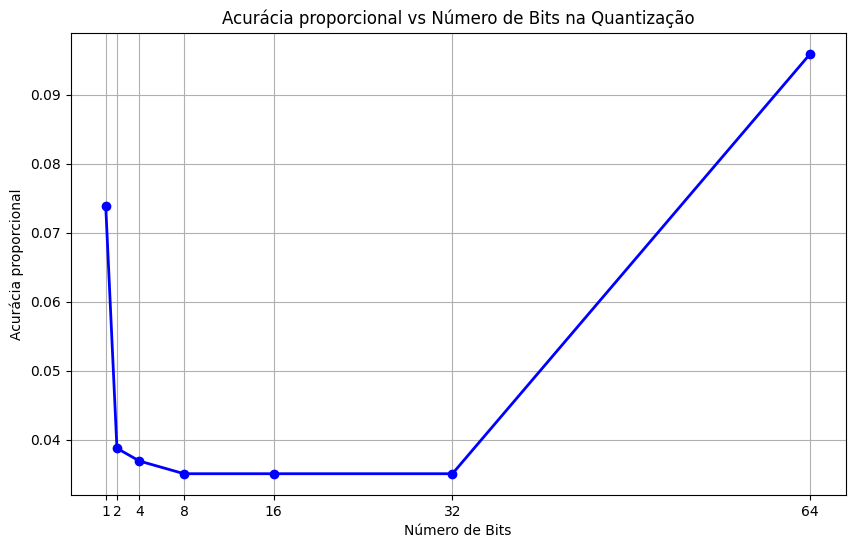


Melhor número de bits: 64
Melhor acurácia: 0.0959


In [ ]:



class my_quantized_DT():
    """
    Navigation through quantized Decision Tree
    Tiago Oliveira Weber 2023 (parte inicial)
    """

    def __init__(self, clf, bits):
        # clf is a sklearn tree classifier
        levels = 2**bits
        max_value = levels-1
        min_value = 0

        # quantizando parâmetros da árvore
        self.threshold = clf.tree_.threshold*max_value
        self.threshold = np.floor(self.threshold)
        self.threshold = self.threshold.astype(
            'int')         # value of comparison
        # sets to zero if threshold is negative
        self.threshold = np.maximum(self.threshold, 0)

        # extraindo os valores da dt do sklearn
        self.children_left = clf.tree_.children_left     # next node if left
        self.children_right = clf.tree_.children_right   # next node if right
        self.feature = clf.tree_.feature    # feature to be compared with
        self.value = clf.tree_.value    # number of members for each class

    def predict(self, X_qt):
        Y = []
        for x in X_qt:
            y = -2  # temp
            node = 0  # resets to root
            while (y < 0):  # not leaf
                next_node, y = self.predict_in_node(node, x)
                node = next_node

            Y.append(y)

        return Y

    def predict_in_node(self, node, x):
        y = -2  # temp
        if (self.feature[node] < 0):  # it is a leaf
            next_node = -1  # does not matter
            y = np.argmax(self.value[node])  # plurality result

        else:
            if x[self.feature[node]] < self.threshold[node]:
                next_node = self.children_left[node]
            else:
                next_node = self.children_right[node]

        return next_node, y
    
    
modelo_quantizado = DecisionTreeClassifier(
    max_depth=best_pruned_model.max_depth,
    random_state=RANDOM_STATE,
    class_weight='balanced'
)
modelo_quantizado.fit(X_train, y_train)

accuracy_score_val_quantizado = accuracy_score(y_val, modelo_quantizado.predict(X_val))
print(f"Acurácia do modelo quantizado no conjunto de validação: {accuracy_score_val_quantizado:.4f}")


# Lista para armazenar as acurácias
acuracias = []
bits_range = [1,2,4,8,16,32,64]  # testa de 1 a 64 bits

# Para cada número de bits
for bits in bits_range:
    # Cria o modelo quantizado
    clf_qt = my_quantized_DT(modelo_quantizado, bits)

    # Quantiza os dados
    max_value = 2**bits-1

    X_temp = X_val * max_value
    X_temp = np.floor(X_temp)
    X_qt = X_temp.astype(int)

    # Faz as previsões
    Y_qt = clf_qt.predict(X_qt)

    # Calcula a acurácia
    acuracia = accuracy_score(y_val, Y_qt)
    acuracias.append(acuracia/accuracy_score_val_quantizado)

    print(f"Bits: {bits}, Acurácia: {acuracia:.4f}")


# Plota os resultados
plt.figure(figsize=(10, 6))
plt.plot(bits_range, acuracias, 'b-o', linewidth=2)
plt.xlabel('Número de Bits')
plt.ylabel('Acurácia proporcional')
plt.title('Acurácia proporcional vs Número de Bits na Quantização')
plt.grid(True)
plt.xticks(bits_range)
plt.show()

# Encontra o melhor número de bits
melhor_bits = bits_range[np.argmax(acuracias)]
print(f"\nMelhor número de bits: {melhor_bits}")
print(f"Melhor acurácia: {max(acuracias):.4f}")

In [ ]:
# # 1. Obtenha as features ótimas determinadas na etapa anterior
# selected_features = ordered_features[:optimal_features]
# print(f"Treinando modelo final com {optimal_features} features: {', '.join(selected_features)}")

# # 2. Obtenha os índices das features selecionadas
# selected_indices = [list(X.columns).index(feat) for feat in selected_features]

# # 3. Defina o número de bits para quantização (obtido na análise anterior)
# print(f"Aplicando quantização de {quantization_bits} bits aos dados")

# # 4. Selecione e quantize as features dos conjuntos de dados
# X_train_selected = X_train[:, selected_indices]
# X_val_selected = X_val[:, selected_indices]
# X_test_selected = X_test[:, selected_indices]

# # Aplicar quantização aos dados
# X_train_quantized = quantize_data(X_train_selected, quantization_bits)
# X_val_quantized = quantize_data(X_val_selected, quantization_bits)
# X_test_quantized = quantize_data(X_test_selected, quantization_bits)

# # 5. Pegue os melhores hiperparâmetros do grid search
# n_estimators = best_pruned_model.n_estimators
# max_depth = best_pruned_model.max_depth

# # 6. Crie e treine o modelo final com os dados quantizados
# final_model = RandomForestClassifier(
#   n_estimators=n_estimators,
#   max_depth=max_depth,
#   random_state=RANDOM_STATE,
#   class_weight='balanced'
# )

# print("\nTreinando modelo final com dados quantizados...")
# start_time = time.time()
# final_model.fit(X_train_quantized, y_train)
# training_time = time.time() - start_time
# print(f"Treinamento concluído em {training_time:.4f} segundos")

# # 7. Avalie nos conjuntos de validação e teste
# y_val_pred = final_model.predict(X_val_quantized)
# val_accuracy = accuracy_score(y_val, y_val_pred)
# val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# y_test_pred = final_model.predict(X_test_quantized)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# baseline_y_test_pred = rf_baseline_model.predict(X_test)
# baseline_accuracy = accuracy_score(y_test, baseline_y_test_pred)
# baseline_f1 = f1_score(y_test, baseline_y_test_pred, average='weighted')

# print("\nDesempenho do Modelo Quantizado ({} bits):".format(quantization_bits))
# print(f"Acurácia na Validação: {val_accuracy:.4f}")
# print(f"F1-score na Validação: {val_f1:.4f}")
# print(f"Acurácia no Teste: {test_accuracy:.4f}")
# print(f"F1-score no Teste: {test_f1:.4f}")
# print(f"Acurácia do Modelo Baseline no Teste: {baseline_accuracy:.4f}")
# print(f"F1-score do Modelo Baseline no Teste: {baseline_f1:.4f}")

# # Calcular economia de espaço com a quantização e redução de features
# original_features = 11  # número total de features no dataset original
# selected_features_count = optimal_features  # número de features selecionadas (4)
# original_bits = 32  # bits por valor em float32
# quantized_bits = quantization_bits  # bits por valor após quantização (8)

# # Tamanho total por amostra para os modelos
# original_size = original_features * original_bits  # 11 * 32 = 352 bits
# optimized_size = selected_features_count * quantized_bits  # 4 * 8 = 32 bits

# # Cálculo da economia total
# total_reduction_percentage = (1 - optimized_size/original_size) * 100

# print(f"\nEconomia de espaço:")
# print(f"  Por quantização: {(1 - quantized_bits/original_bits)*100:.1f}% por valor (de {original_bits} para {quantized_bits} bits)")
# print(f"  Por seleção de features: {(1 - selected_features_count/original_features)*100:.1f}% (de {original_features} para {selected_features_count} features)")
# print(f"  Economia total: {total_reduction_percentage:.1f}% (de {original_size} para {optimized_size} bits por amostra)")
# print(f"  Tamanho relativo: {(optimized_size/original_size*100):.1f}% do original")

# # 8. Exiba a matriz de confusão para o conjunto de teste
# plt.figure(figsize=(10, 8))
# conf_matrix = confusion_matrix(y_test, y_test_pred)
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
#       xticklabels=sorted(np.unique(y)),
#       yticklabels=sorted(np.unique(y)))
# plt.xlabel('Previsão')
# plt.ylabel('Valor Real')
# plt.title(f'Matriz de Confusão - Modelo Final ({quantization_bits} bits)')
# plt.show()

# # 9. Exiba o relatório de classificação
# print("\nRelatório de Classificação no Conjunto de Teste:")
# print(classification_report(y_test, y_test_pred))

Treinando modelo final com 6 features: density, free sulfur dioxide, fixed acidity, total sulfur dioxide, pH, alcohol


NameError: name 'quantization_bits' is not defined

In [ ]:
import joblib

# Salva o conjunto de testes para uso no terminal
joblib.dump((X_test_quantized, y_test), './stm32_firmware/Core/wine_quality_test_set.pkl') 

In [ ]:
# Converte para o formato C para uso em microcontroladores
import emlearn

# Converter para C
cmodel = emlearn.convert(final_model)
cmodel.save(file='./stm32_firmware/Core/Inc/modelo_convertido.h')

In [ ]:

# For more readable output with feature names
import pandas as pd


# Create a DataFrame for clearer visualization (with feature names)
# X_test_df = pd.DataFrame(X_test_quantized[:2], columns=selected_features)
# print("\nX_test_quantized as DataFrame with feature names:")
# display(X_test_df)

# # Display the first 2 lines of y_test
# print("\nFirst 2 rows of y_test:")
# print(y_test[:4])

print(X_test_selected[:2])

# Verifique o tipo de dado de cada item (linha) do array X_test_quantized[:2]
for i, row in enumerate(X_test_quantized[:2]):
  print(f"Linha {i}: tipo = {type(row)}, dtype = {row.dtype if hasattr(row, 'dtype') else 'N/A'}")

# Get feature names from the original selected features
selected_features = ordered_features[:optimal_features]
